**Import Libraries**


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


**Load The Numerical Set**


In [2]:
df = pd.read_csv(r"creditcard_2023.csv")
print(df.shape)


(568630, 31)


**Check For Missing Values**


--- Feature Statistics (Mean should be ~0 for V-features) ---
             mean       std        min         max
V1  -5.638058e-17  1.000001  -3.495584    2.229046
V2  -1.319545e-16  1.000001 -49.966572    4.361865
V3  -3.518788e-17  1.000001  -3.183760   14.125834
V4  -2.879008e-17  1.000001  -4.951222    3.201536
V5   7.997245e-18  1.000001  -9.952786   42.716891
V6  -3.958636e-17  1.000001 -21.111108   26.168402
V7  -3.198898e-17  1.000001  -4.351839  217.873038
V8   2.109273e-17  1.000001 -10.756342    5.958040
V9   3.998623e-17  1.000001  -3.751919   20.270062
V10  1.991314e-16  1.000001  -3.163276   31.722709

--- Variance of First 5 PCA Features vs Amount ---
V1        1.000002e+00
V2        1.000002e+00
V3        1.000002e+00
V4        1.000002e+00
V5        1.000002e+00
Amount    4.788148e+07
dtype: float64


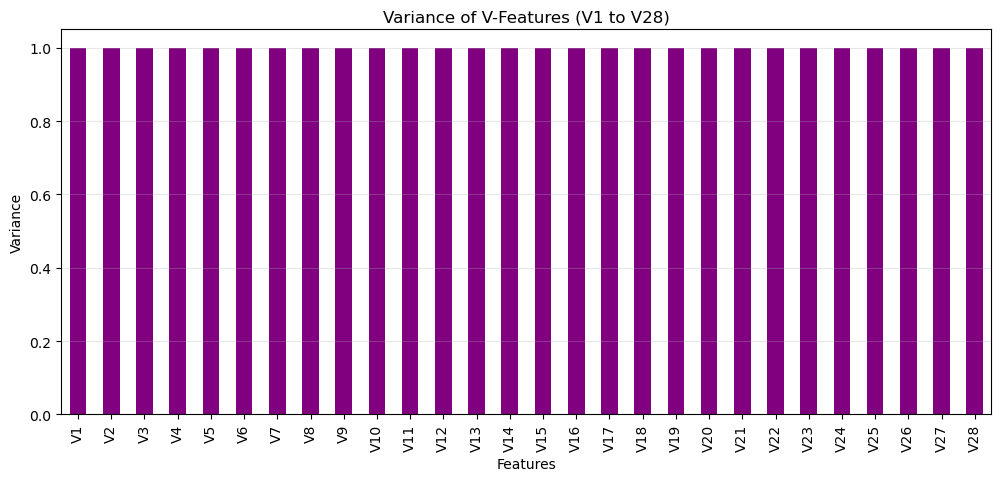

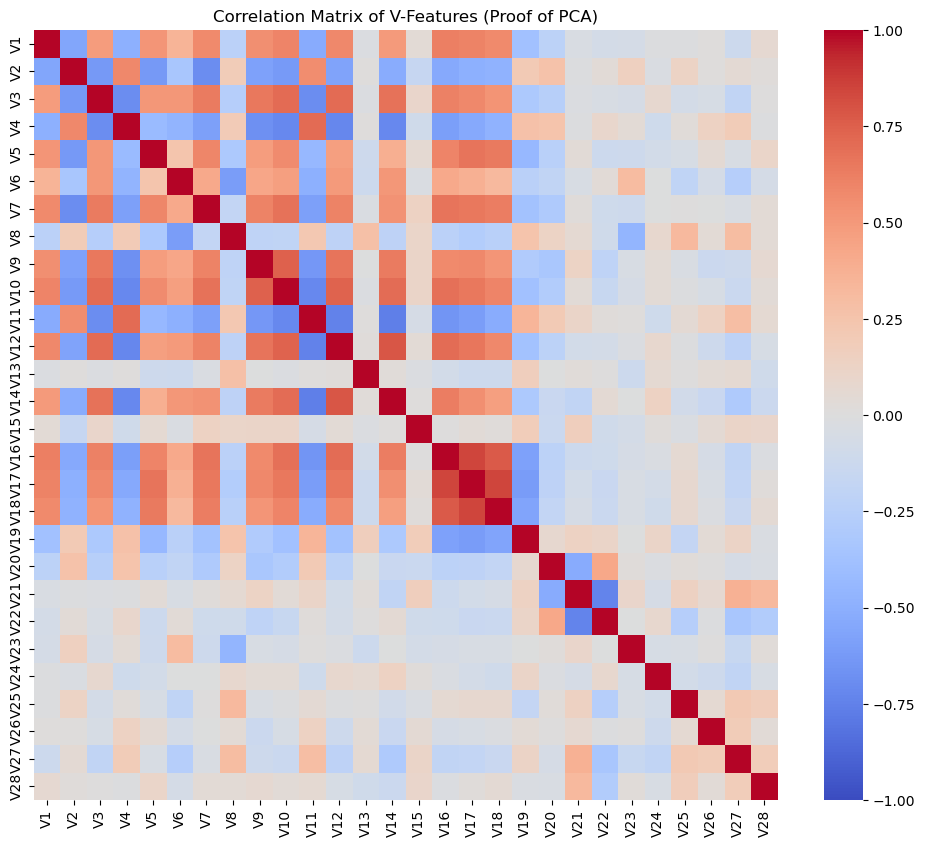

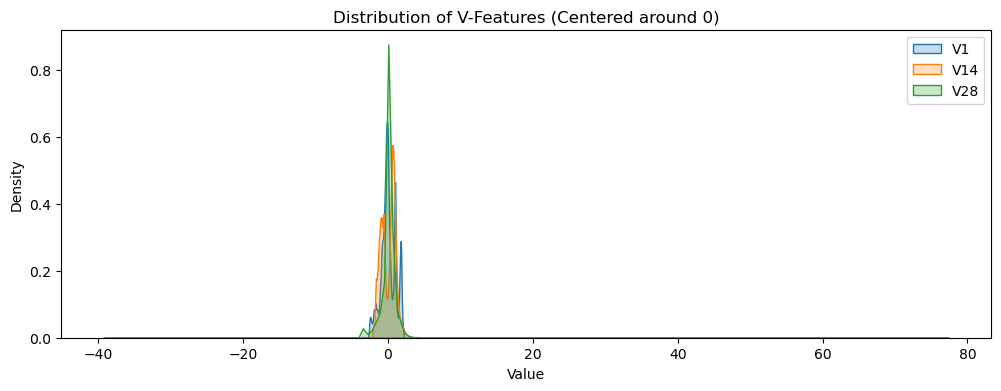

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Drop ID if present
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# --- A. Check Feature Ranges (Min, Max, Mean) ---
print("--- Feature Statistics (Mean should be ~0 for V-features) ---")
# .T transposes the table to make it readable
stats = df.describe().T[['mean', 'std', 'min', 'max']]
print(stats.head(10)) # Show first 10 rows (V1-V10)

# --- B. Check Variance ---
print("\n--- Variance of First 5 PCA Features vs Amount ---")
print(df[['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']].var())

# Plot Variance of V-features only
plt.figure(figsize=(12, 5))
# Excluding 'Class' and 'Amount' to see PCA features clearly
df.drop(['Class', 'Amount'], axis=1).var().plot(kind='bar', color='purple')
plt.title('Variance of V-Features (V1 to V28)')
plt.ylabel('Variance')
plt.xlabel('Features')
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- C. Prove PCA using Correlation Matrix ---
# PCA transforms data into orthogonal components, meaning 
# V1, V2...V28 should have ZERO correlation with each other.

plt.figure(figsize=(12, 10))
# Select only V features
v_features = df.iloc[:, 0:28] 
corr_matrix = v_features.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of V-Features (Proof of PCA)')
plt.show()

# --- D. Visualize Distributions (Centering) ---
# PCA features are usually centered around 0.
plt.figure(figsize=(12, 4))
for col in ['V1', 'V14', 'V28']: # Plot first, middle, last PCA feature
    sns.kdeplot(df[col], label=col, fill=True)

plt.title('Distribution of V-Features (Centered around 0)')
plt.xlabel('Value')
plt.legend()
plt.show()

In [5]:
print(df.isnull().sum())


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Remove Duplicate Rows**


In [6]:
df_clean = df.drop_duplicates()
print("Before:", df.shape)
print("After:", df_clean.shape)


Before: (568630, 31)
After: (568630, 31)


Scaling(Amount)


In [7]:
# 2. DROP 'id' 
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("Dropped 'id' column.")

# 3. Handle 'Amount' using RobustScaler
# We do NOT touch V1-V28. We only scale Amount.
scaler = RobustScaler()

# Reshape 
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


print(df.head())

Dropped 'id' column.
         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.130006  0.727159  0.637735  ... -0.110552  0.217606 -0.134794  0.165959   
1 -0.133118  0.347452  0.529808  ... -0.194936 -0.605761  0.079469 -0.577395   
2 -0.095576 -0.261297  0.690708  ... -0.005020  0.702906  0.945045 -1.154666   
3 -0.065130 -0.205698  0.575231  ... -0.146927 -0.038212 -0.214048 -1.893131   
4 -0.212660  1.049921  0.968046  ... -0.106984  0.729727 -0.161666  0.312561   

        V25       V26       V27       V28    Am

In [8]:
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]


**Separate Features & Targets**


**Split Into Training-Validation-Test**


In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


**Save Cleaned & Split Data**


In [10]:
np.save("X2_train.npy", X_train)
np.save("X2_val.npy", X_val)
np.save("X2_test.npy", X_test)
np.save("y2_train.npy", y_train)
np.save("y2_val.npy", y_val)
np.save("y2_test.npy", y_test)


**Load Train-Validation-Test Sets**


In [11]:
X_train = np.load("X2_train.npy")
X_val   = np.load("X2_val.npy")
X_test  = np.load("X2_test.npy")


**Apply Variance Threshold Feature Selection**


In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold(threshold=0.01)
# X_train_selected = selector.fit_transform(X_train)
# X_val_selected   = selector.transform(X_val)
# X_test_selected  = selector.transform(X_test)


**Apply Feature Standardization**


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


**Save Scaled Data**


In [15]:
np.save("X2_train_scaled.npy", X_train_scaled)
np.save("X2_val_scaled.npy", X_val_scaled)
np.save("X2test_scaled.npy", X_test_scaled)


Import Libraries


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

Load Preprocessed Train/Validation/Test Sets


In [17]:
X_train = np.load("X2_train_scaled.npy")
X_val   = np.load("X2_val_scaled.npy")
y_train = np.load("y2_train.npy")
y_val   = np.load("y2_val.npy")

Linear Regression


In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
val_pred_lin = lin_reg.predict(X_val_scaled)

Ridge & Lasso with Hyperparameter Tuning


In [19]:
params = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
lasso = Lasso(max_iter=10000)

ridge_cv = GridSearchCV(ridge, params, cv=5, scoring="neg_mean_squared_error")
lasso_cv = GridSearchCV(lasso, params, cv=5, scoring="neg_mean_squared_error")

ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_cv.best_params_)
print("Best Lasso alpha:", lasso_cv.best_params_)

Best Ridge alpha: {'alpha': 0.01}
Best Lasso alpha: {'alpha': 0.01}


Import Libraries


In [20]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

KNN Regressor


In [52]:
knn = KNeighborsRegressor(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)

KNeighborsRegressor()

Hyperparameter Tuning


In [53]:
errors = []
for k in range(3, 51, 2):
    knn = KNeighborsRegressor(n_neighbors=k, weights="distance", metric="euclidean")
    knn.fit(X_train, y_train)
    val_pred = knn.predict(X_val)
    mse = np.mean((y_val - val_pred)**2)
    errors.append((k, mse))

Plot Error vs. k Graph


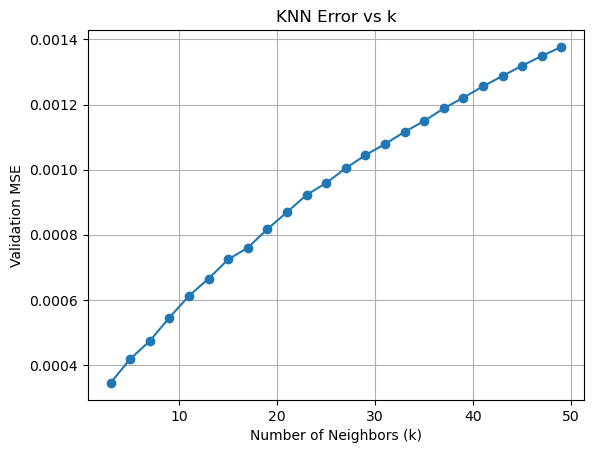

In [54]:
ks, mses = zip(*errors)
plt.plot(ks, mses, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation MSE")
plt.title("KNN Error vs k")
plt.grid(True)
plt.show()


Best Model


In [56]:
best_k = min(errors, key=lambda x: x[1])
print("Best k:", best_k)

Best k: (3, np.float64(0.00034492641804971167))


Training Linear Regression (Ridge)...

--- Linear Regression Results ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     42464
           1       1.00      0.98      0.99     42831

    accuracy                           0.99     85295
   macro avg       0.99      0.99      0.99     85295
weighted avg       0.99      0.99      0.99     85295



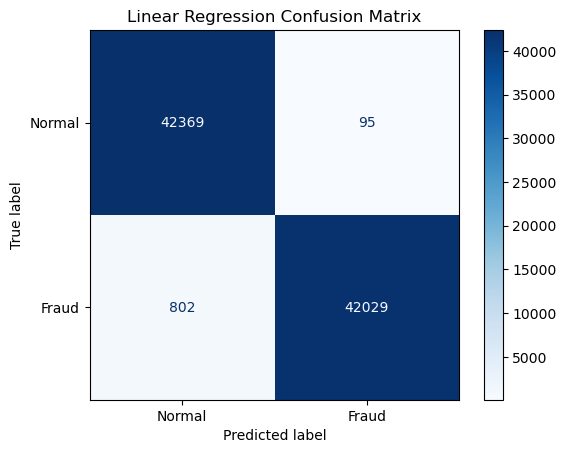

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Initialize the Best Linear Model (Ridge with alpha=0.01)
# We use Ridge because it handles multicollinearity (correlated features) well.
lin_model = Ridge(alpha=0.01)

# 2. Train on the Scaled Data
print("Training Linear Regression (Ridge)...")
lin_model.fit(X_train_scaled, y_train)

# 3. Predict Raw Scores (Continuous Numbers)
# The model will output numbers like -0.2, 0.8, 1.2, etc.
y_pred_raw = lin_model.predict(X_test_scaled)

# Linear Regression doesn't give 0 or 1. It gives a score.
# We must decide: "Anything above 0.5 is Fraud".
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred_raw]

# 4. Evaluate
print("\n--- Linear Regression Results ---")
print(classification_report(y_test, y_pred_class))

# 5. Visual Proof (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Linear Regression Confusion Matrix")
plt.show()

In [ ]:
import joblib

# 1. Save the trained model
joblib.dump(lin_model, 'fraud_detection_model.pkl')

# You used 'scaler' in your earlier code to transform X_train
joblib.dump(scaler, 'scaler.pkl')

print("Success! Model and Scaler have been saved ")

Success! Model and Scaler have been saved to your disk.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 1. predictions (continuous numbers like 0.8, -0.1, 1.2)
y_pred_raw = lin_model.predict(X_test_scaled)

# 2. Calculate MSE (Mean Squared Error)

mse = mean_squared_error(y_test, y_pred_raw)

# 3. Calculate RMSE (Root Mean Squared Error)
# Same units as your target (0 to 1). Easier to interpret.
rmse = np.sqrt(mse)

# 4. Calculate MAE (Mean Absolute Error)
# The average "distance" 
mae = mean_absolute_error(y_test, y_pred_raw)

print(f"--- Regression Metrics ---")
print(f"MSE:  {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE:  {mae:.5f}")

--- Regression Metrics ---
MSE:  0.03243
RMSE: 0.18009
MAE:  0.13943


Confusion Matrix


<Figure size 600x500 with 0 Axes>

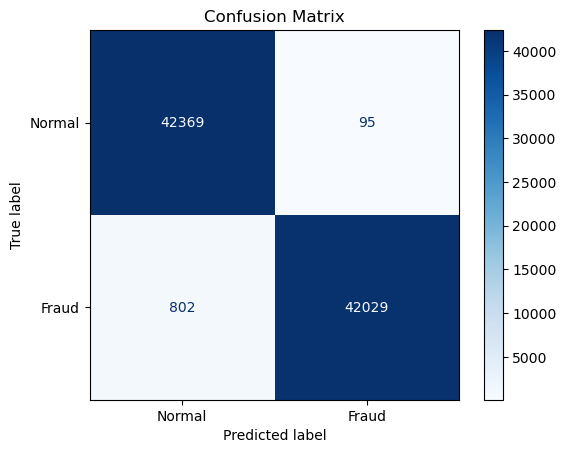

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Predict the classes (0 or 1)
# We use a threshold of 0.5. Anything higher is "Fraud".
y_pred_raw = lin_model.predict(X_test_scaled)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred_raw]

# 2. Compute the matrix numbers
cm = confusion_matrix(y_test, y_pred_class)

# 3. Plot it
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Fraud"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

ROC Curve


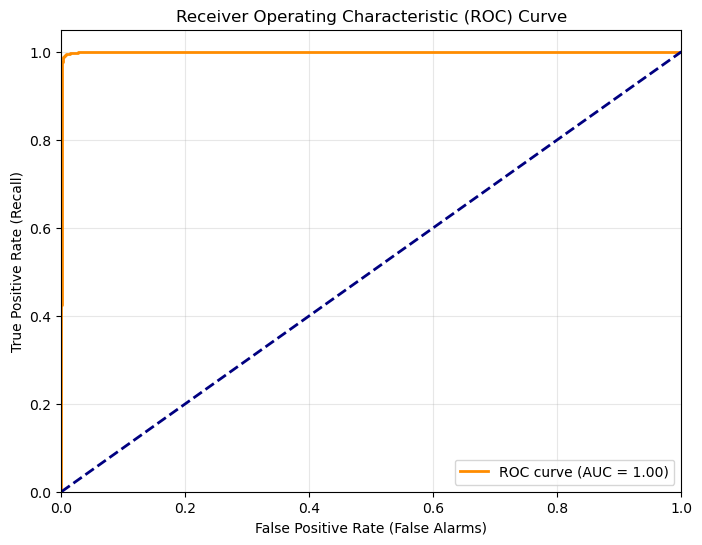

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Get raw scores (Do NOT convert to 0/1 here)
y_scores = lin_model.predict(X_test_scaled)

# 2. Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 3. Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# 4. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The 50% guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

Loss Curve (Learning Curve)


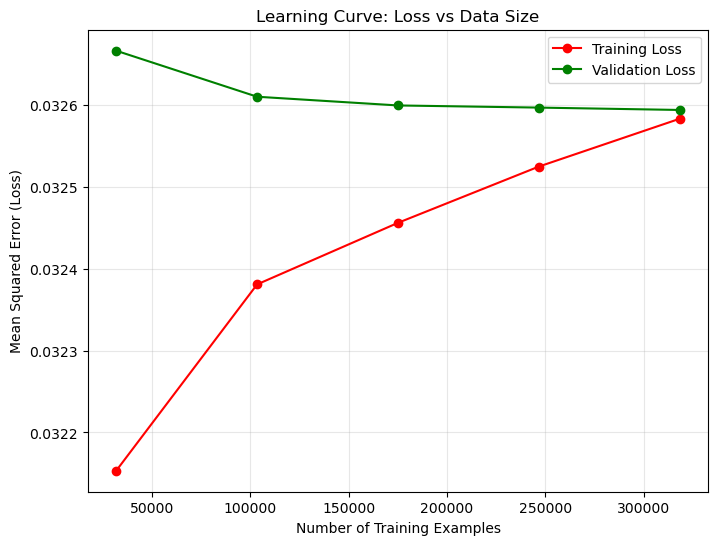

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# 1. Compute the learning curve
# This splits the data into 5 chunks (10%, 30%, 50%, etc.) and trains on each.
train_sizes, train_scores, test_scores = learning_curve(
    lin_model, 
    X_train_scaled, 
    y_train, 
    cv=5, 
    scoring='neg_mean_squared_error', # We measure Error (MSE)
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# 2. Convert scores to positive Error values
train_loss = -np.mean(train_scores, axis=1)
test_loss = -np.mean(test_scores, axis=1)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', color="r", label="Training Loss")
plt.plot(train_sizes, test_loss, 'o-', color="g", label="Validation Loss")
plt.xlabel("Number of Training Examples")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Learning Curve: Loss vs Data Size")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()

Score Distribution Histogram


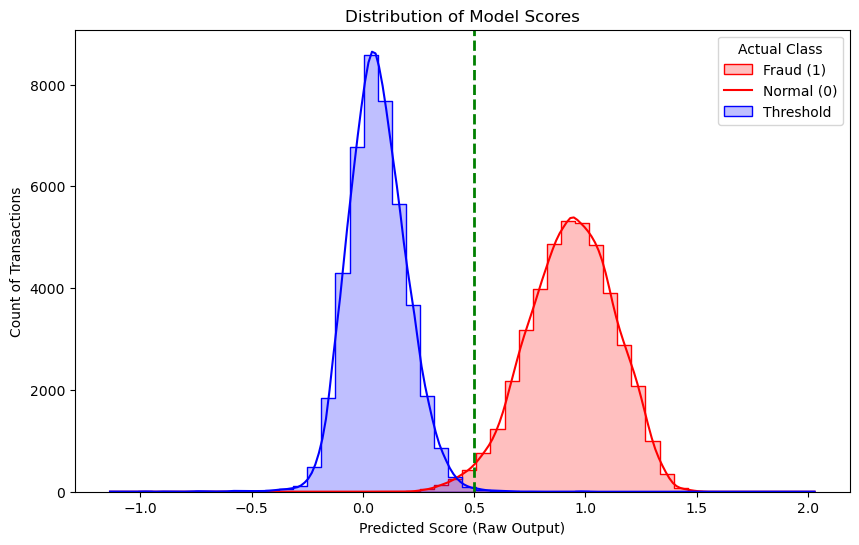

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Get predictions
y_pred_raw = lin_model.predict(X_test_scaled)

# 2. Organize data for plotting
results_df = pd.DataFrame({
    'Actual Class': y_test,
    'Predicted Score': y_pred_raw
})

# 3. Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=results_df, 
    x='Predicted Score', 
    hue='Actual Class', 
    kde=True,               # Draw the smooth curve line
    element="step", 
    palette={0: 'blue', 1: 'red'}, 
    bins=50
)

# 4. Add the Threshold Line
plt.axvline(0.5, color='green', linestyle='--', linewidth=2, label='Threshold (0.5)')

plt.title('Distribution of Model Scores')
plt.xlabel('Predicted Score (Raw Output)')
plt.ylabel('Count of Transactions')
plt.legend(title='Actual Class', labels=['Fraud (1)', 'Normal (0)', 'Threshold'])
plt.show()

Train and Save the Model


In [41]:
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np

# 1. Initialize and Train
print("Training KNN Model... (This might take a minute)")
# We use k=3 and 'distance' weights or default based on your tuning
knn_model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train)

# 2. Save the model immediately
joblib.dump(knn_model, 'fraud_detection_knn.pkl')
print("Model saved successfully as 'fraud_detection_knn.pkl'")

# 3. Generate Basic Report
y_scores = knn_model.predict(X_test_scaled)
# Thresholding at 0.5 to get class labels (0 or 1)
y_pred_class = [1 if x > 0.5 else 0 for x in y_scores]

print("\n--- KNN Results ---")
print(f"MSE: {mean_squared_error(y_test, y_scores):.5f}")
print(classification_report(y_test, y_pred_class))

Training KNN Model... (This might take a minute)
Model saved successfully as 'fraud_detection_knn.pkl'

--- KNN Results ---
MSE: 0.00046
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42464
           1       1.00      1.00      1.00     42831

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



Plot Confusion Matrix


<Figure size 600x500 with 0 Axes>

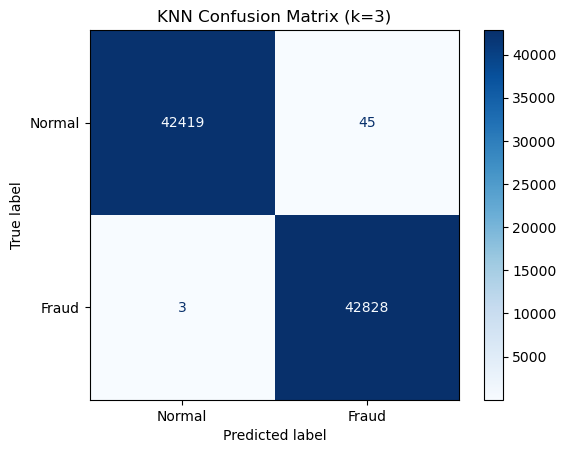

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Calculate Confusion Matrix
# We reuse the y_pred_class we calculated in Step 1
cm = confusion_matrix(y_test, y_pred_class)

# 2. Plot
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Fraud"])

disp.plot(cmap='Blues', values_format='d')

plt.title("KNN Confusion Matrix (k=3)")
plt.show()

ROC Curve


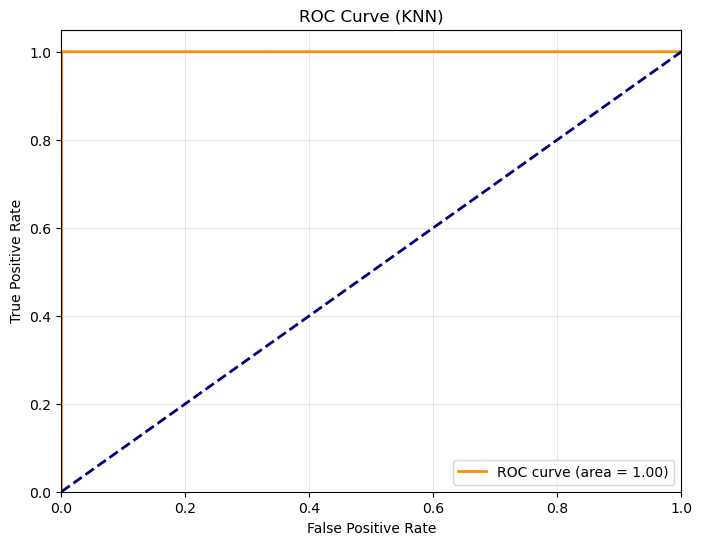

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Get raw scores
y_scores = knn_model.predict(X_test_scaled)

# 2. Calculate Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

Learning Curve (Loss)


Generating Learning Curve... Please wait.


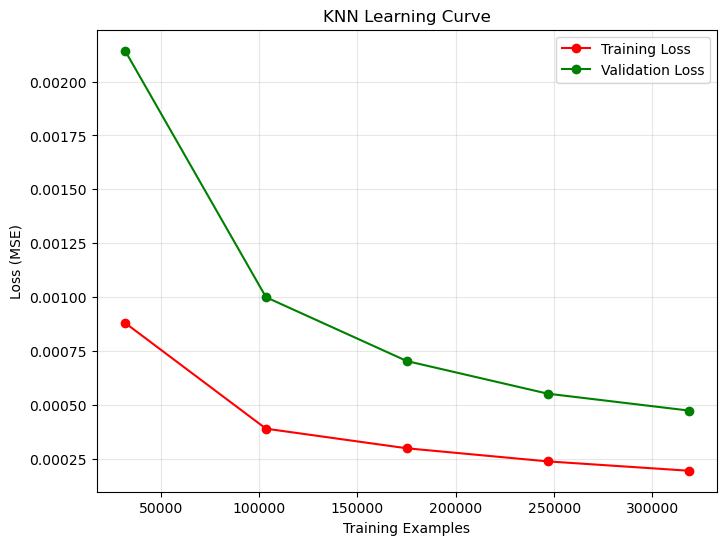

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

print("Generating Learning Curve... Please wait.")

# 1. Compute Curve Data
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, 
    X_train_scaled, 
    y_train, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# 2. Convert to Positive Loss
train_loss = -np.mean(train_scores, axis=1)
test_loss = -np.mean(test_scores, axis=1)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', color="r", label="Training Loss")
plt.plot(train_sizes, test_loss, 'o-', color="g", label="Validation Loss")

plt.xlabel("Training Examples")
plt.ylabel("Loss (MSE)")
plt.title("KNN Learning Curve")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()

Score Distribution (Histogram)


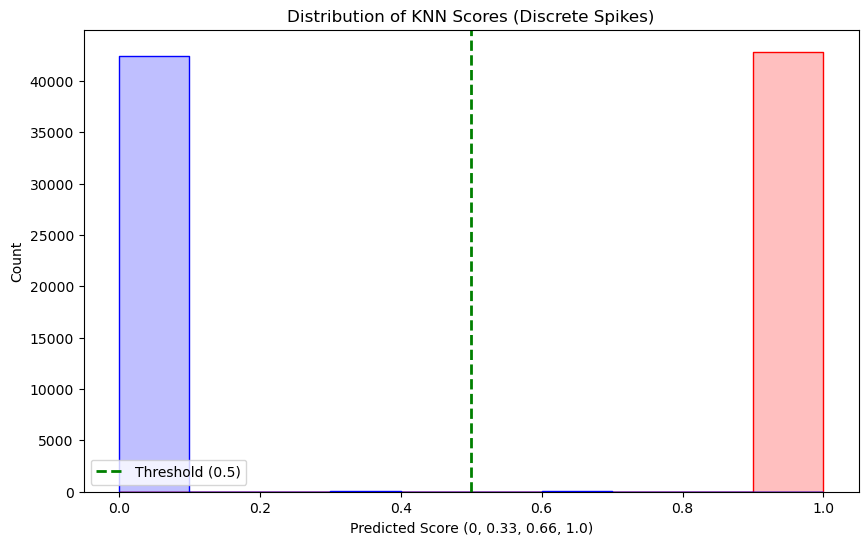

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Prepare Data
y_scores = knn_model.predict(X_test_scaled)
results_df = pd.DataFrame({'Actual Class': y_test, 'Predicted Score': y_scores})

# 2. Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=results_df, 
    x='Predicted Score', 
    hue='Actual Class', 
    kde=False, # Must be False for KNN (discrete data)
    element="step", 
    palette={0: 'blue', 1: 'red'}, 
    bins=10
)

plt.axvline(0.5, color='green', linestyle='--', linewidth=2, label='Threshold (0.5)')
plt.title('Distribution of KNN Scores (Discrete Spikes)')
plt.xlabel('Predicted Score (0, 0.33, 0.66, 1.0)')
plt.legend()
plt.show()

KNN Regression Metrices


In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Get the raw predictions from your trained KNN model
# These will be numbers like 0.0, 0.33, 0.66, 1.0 (since k=3)
y_pred_knn = knn_model.predict(X_test_scaled)

# 2. Calculate MSE (Mean Squared Error) first
mse = mean_squared_error(y_test, y_pred_knn)

# 3. Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# 4. Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred_knn)

print(f"--- KNN Regression Metrics ---")
print(f"MSE:  {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE:  {mae:.5f}")

--- KNN Regression Metrics ---
MSE:  0.00046
RMSE: 0.02141
MAE:  0.00066
